# There is some exercises from [deep-ml](https://www.deep-ml.com/problems)

In [70]:
docs = [
    "it is sunny morning, when i want to go to school",
    "when it is dead you cant create something new что",
    "что такое осень, это небо, небо и слякоть под ногами it has been go"
]

In [98]:
from collections import Counter
import numpy as np

def tf(doc, uniq_words):
    """Compute term frequency for a single document"""
    word_count = Counter(doc.split())
    total_words = len(doc.split())  
    return np.array([word_count[word] / total_words if total_words > 0 else 0 for word in uniq_words])

def idf(docs, uniq_words):
    """Compute inverse document frequency across all documents"""
    n = len(docs)
    df = np.array([sum(1 for doc in docs if word in doc.split()) for word in uniq_words], dtype=np.float64)
    idf_m = np.log(n / (df + 1e-6))  
    return idf_m

def tfidf(docs, word=None):
    """Compute the TF-IDF matrix for all documents"""
    uniq_words = list(set(word for doc in docs for word in doc.split()))
    idf_values = idf(docs, uniq_words)
    tfidf_matrix = np.array([tf(doc, uniq_words) * idf_values for doc in docs])
    return tfidf_matrix, uniq_words

In [99]:
tfidf(docs)

(array([[ 0.00000000e+00,  3.68604189e-02,  9.98737535e-02,
          1.99747507e-01,  0.00000000e+00, -3.03030253e-08,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          9.98737535e-02,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  9.98737535e-02,  0.00000000e+00,
          3.68604189e-02,  9.98737535e-02,  0.00000000e+00,
          9.98737535e-02,  0.00000000e+00,  3.68604189e-02,
          0.00000000e+00],
        [ 1.09861129e-01,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  1.09861129e-01, -3.33333278e-08,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  4.05464608e-02,  0.00000000e+00,
          0.00000000e+00,  1.09861129e-01,  1.09861129e-01,
          0.00000000e+00,  1.09861129e-01,  1.09861129e-01,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          4.0

In [127]:
import numpy as np
from collections import Counter

def tf(doc, uniq_words):
    """Compute term frequency for a single document"""
    word_count = Counter(doc)
    total_words = len(doc)  
    return np.array([word_count[word] / total_words if total_words > 0 else 0 for word in uniq_words])

def idf(docs, uniq_words):
    """Compute inverse document frequency across all documents"""
    n = len(docs)
    df = np.array([sum(1 for doc in docs if word in doc) for word in uniq_words], dtype=np.float64)
    idf_m = np.log(n / (df + 1))  
    return idf_m

def compute_tf_idf(corpus, query):
	"""
	Compute TF-IDF scores for a query against a corpus of documents.
    
	:param corpus: List of documents, where each document is a list of words
	:param query: List of words in the query
	:return: List of lists containing TF-IDF scores for the query words in each document
	"""
	uniq_words = list(set(word for doc in corpus for word in doc))
	idf_values = idf(corpus, uniq_words)
	tfidf_matrix = np.array([tf(doc, uniq_words) * idf_values for doc in corpus])
	print(uniq_words)
	indexes = [uniq_words.index(q) for q in query]
	print(indexes)
	return tfidf_matrix, [[elem] for elem in tfidf_matrix[:, indexes]]


In [128]:
corpus = [
    ["the", "cat", "sat", "on", "the", "mat"],
    ["the", "dog", "chased", "the", "cat"],
    ["the", "bird", "flew", "over", "the", "mat"]
]
query = ["cat"]

print(compute_tf_idf(corpus, query))

['over', 'dog', 'bird', 'mat', 'flew', 'chased', 'sat', 'on', 'the', 'cat']
[9]
(array([[ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.06757752,  0.06757752, -0.09589402,  0.        ],
       [ 0.        ,  0.08109302,  0.        ,  0.        ,  0.        ,
         0.08109302,  0.        ,  0.        , -0.11507283,  0.        ],
       [ 0.06757752,  0.        ,  0.06757752,  0.        ,  0.06757752,
         0.        ,  0.        ,  0.        , -0.09589402,  0.        ]]), [[array([0.])], [array([0.])], [array([0.])]])


# Matrix-Vector Dot Product

In [ ]:
a = [[1, 2], [2, 4]]
b = [1, 2]

def matrix_dot_vector(a, b):
    if len(a[0]) != len(b):
        return -1
    return [sum(row[i] * b[i] for i in range(len(b))) for row in a]

def matrix_dot_vector(a, b):
    # Return a list where each element is the dot product of a row of 'a' with 'b'.
    # If the number of columns in 'a' does not match the length of 'b', return -1.
    if len(a[0]) != len(b):
        return -1
    answer = []
    s = 0
    for row in a:
        for ind, elem in enumerate(row):
            s += elem * b[ind]
        answer.append(s)
        s = 0
        
    return answer

In [209]:
# Reshape Matrix

import numpy as np

a = [[1,2,3,4],[5,6,7,8]]
new_shape = (4, 2)

def reshape_matrix(a: list[list[int|float]], new_shape: tuple[int, int]) -> list[list[int|float]]:
    #Write your code here and return a python list after reshaping by using numpy's tolist() method 
    try:
        return np.array(a).reshape(new_shape).tolist()
    except:
        return []

reshape_matrix(a, new_shape)

[[1, 2], [3, 4], [5, 6], [7, 8]]

In [ ]:
# Calculate Mean by Row or Column

matrix = [[1, 2, 3], [4, 5, 6], [7, 8, 9]]
mode = 'column'

def calculate_matrix_mean(matrix: list[list[float]], mode: str) -> list[float]:
    if mode == 'row':
        return [
            sum(row) / len(row) for row in matrix
        ]
    # s = 0
    # answer = []
    # for ind, elem in enumerate(matrix):
    #     for row in matrix:
    #         s += row[ind]
    #     answer.append(s / len(matrix))
    #     s = 0
    # return answer
    return [sum(row[i] for row in matrix) / len(matrix) for i in range(len(matrix[0]))]

matrix = [[1, 2, 3], [4, 5, 6], [7, 8, 9]]

calculate_matrix_mean(matrix, 'column')

In [207]:
# Scalar Multiplication of a Matrix

matrix = [[1, 2, 3], [3, 4]]
scalar = 2

def scalar_multiply(matrix: list[list[int|float]], scalar: int|float) -> list[list[int|float]]:

	return	[
			[matrix[j][i] * scalar for i in range(len(matrix))]
			for j in range(len(matrix))
        ]

scalar_multiply(matrix, scalar)

[[2, 4], [6, 8]]

In [ ]:
# Calculate Eigenvalues of a Matrix

matrix = [[2, 1], [1, 2]]
import math
def calculate_eigenvalues(matrix: list[list[float|int]]) -> list[float]:
    a = matrix[0][0]
    b = matrix[0][1]
    c = matrix[1][0]
    d = matrix[1][1]

    tr = a + d
    det = a * d - b * c

    descrim = tr * tr - 4 * 1 * det

    x1 = (tr + math.sqrt(descrim)) / 2 * 1
    x2 = (tr - math.sqrt(descrim)) / 2 * 1

    return sorted([x1, x2], reverse=True)

calculate_eigenvalues(matrix)

In [ ]:
# Linear Regression Using Normal Equation

X = np.array([[1, 1], [1, 2], [1, 3]])
y = np.array([1, 2, 3])
alpha = 0.01
iterations = 1000

import numpy as np

def linear_regression_gradient_descent(X: np.ndarray, y: np.ndarray, alpha: float, iterations: int) -> np.ndarray:
    m, n = X.shape
    theta = np.zeros((n, 1))
    y = y.reshape(-1, 1)
    for _ in range(iterations):
        y_pred = X @ theta
        error = y_pred - y
        theta -= grad(m, X, error) * alpha

    return np.round(theta, 4)

def grad(m, X, error):
    return (1 / m) * (X.T @ error)

linear_regression_gradient_descent(X, y, alpha, iterations)

In [ ]:
import numpy as np
import math

# Implement TF-IDF (Term Frequency-Inverse Document Frequency)

corpus = [
    ["the", "cat", "sat", "on", "the", "mat"],
    ["the", "dog", "chased", "the", "cat"],
    ["the", "bird", "flew", "over", "the", "mat"]
]
query = ["cat"]

def compute_tf(doc, uniq_words):
    """Compute term frequency for a document"""
    word_count = {word: 0 for word in uniq_words}
    total_words = len(doc)

    for word in doc:
        word_count[word] += 1
    
    return {word: word_count[word] / total_words if total_words > 0 else 0 for word in uniq_words}


def compute_idf(corpus, uniq_words):
    """Compute inverse document frequency for all words in the corpus"""
    num_docs = len(corpus)
    doc_freq = {word: 0 for word in uniq_words}

    for word in uniq_words:
        for doc in corpus:
            if word in doc:
                doc_freq[word] += 1
    
    return {word: math.log((num_docs + 1) / (doc_freq[word] + 1)) + 1 for word in uniq_words}
	

def compute_tf_idf(corpus, query):
	"""
	Compute TF-IDF scores for a query against a corpus of documents.
    
	:param corpus: List of documents, where each document is a list of words
	:param query: List of words in the query
	:return: List of lists containing TF-IDF scores for the query words in each document
	"""
	if not corpus:
		return []
	uniq_words = list(
		set(
			[
				word for doc in corpus
				for word in doc
			]
		))
      
	idf_values = compute_idf(corpus, uniq_words)
	
	tfidf_matrix = []
	for doc in corpus:
		tf = compute_tf(doc=doc, uniq_words=uniq_words)
		tfidf_scores = [tf.get(q, 0) * idf_values.get(q, 0) for q in query]
		tfidf_matrix.append(tfidf_scores)
	return np.round(tfidf_matrix, 5).tolist()
	
compute_tf_idf(corpus, query)

In [ ]:
# Single Neuron

features = [[0.5, 1.0], [-1.5, -2.0], [2.0, 1.5]]
labels = [0, 1, 0]
weights = [0.7, -0.4]
bias = -0.1

import math

def sigmoid(z):
    return 1 / (1 + math.exp(-z))

def single_neuron_model(features: list[list[float]], labels: list[int], weights: list[float], bias: float) -> (list[float], float):

    out_matrix = [sum(row[j] * weights[j] for j in range(len(weights))) for row in features]
    bias_matrix = [elem + bias for elem in out_matrix]
    probabilities = [round(sigmoid(elem), 4) for elem in bias_matrix]
    mse = round(sum([math.pow((prob - true), 2) for prob, true in zip(probabilities,labels )]) / len(labels), 4)
    return probabilities, mse

single_neuron_model(features, labels, weights, bias)

In [406]:
# single neron with backprop

import numpy as np

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def train_neuron(features: np.ndarray, labels: np.ndarray, initial_weights: np.ndarray, initial_bias: float, learning_rate: float, epochs: int):
    weights = np.array(initial_weights, dtype=np.float64)
    bias = float(initial_bias)
    m = len(labels)  # Number of samples
    mse_values = []

    for _ in range(epochs):
        # Compute predictions
        linear_output = np.dot(features, weights) + bias
        predictions = sigmoid(linear_output)

        # Compute Mean Squared Error (MSE)
        errors = predictions - labels
        mse = np.mean(errors ** 2)
        mse_values.append(round(mse, 4).item())

        # Compute gradients
        gradient_weights = (2 / m) * np.dot(features.T, errors * predictions * (1 - predictions))
        gradient_bias = (2 / m) * np.sum(errors * predictions * (1 - predictions))

        # Update weights and bias
        weights -= learning_rate * gradient_weights
        bias -= learning_rate * gradient_bias

    return np.round(weights, 4).tolist(), round(bias, 4).item(), mse_values

# Test Case
print(train_neuron(
    np.array([[1.0, 2.0], [2.0, 1.0], [-1.0, -2.0]]),
    np.array([1, 0, 0]),
    np.array([0.1, -0.2]),
    0.0,
    0.1,
    100
))

([-0.489, 0.8924], -0.5059, [0.3033, 0.2942, 0.2856, 0.2774, 0.2697, 0.2625, 0.2556, 0.2493, 0.2433, 0.2377, 0.2324, 0.2274, 0.2228, 0.2184, 0.2142, 0.2103, 0.2065, 0.2029, 0.1995, 0.1963, 0.1932, 0.1902, 0.1873, 0.1845, 0.1818, 0.1792, 0.1767, 0.1742, 0.1718, 0.1695, 0.1672, 0.165, 0.1629, 0.1608, 0.1588, 0.1567, 0.1548, 0.1529, 0.151, 0.1492, 0.1474, 0.1456, 0.1439, 0.1422, 0.1405, 0.1389, 0.1373, 0.1357, 0.1342, 0.1326, 0.1312, 0.1297, 0.1283, 0.1269, 0.1255, 0.1241, 0.1228, 0.1215, 0.1202, 0.1189, 0.1177, 0.1165, 0.1153, 0.1141, 0.1129, 0.1118, 0.1107, 0.1096, 0.1085, 0.1074, 0.1064, 0.1054, 0.1043, 0.1034, 0.1024, 0.1014, 0.1005, 0.0995, 0.0986, 0.0977, 0.0968, 0.0959, 0.0951, 0.0942, 0.0934, 0.0925, 0.0917, 0.0909, 0.0901, 0.0894, 0.0886, 0.0878, 0.0871, 0.0864, 0.0856, 0.0849, 0.0842, 0.0835, 0.0828, 0.0822])


In [ ]:
# log softmax

A = np.array([1, 2, 3])

import math
import numpy as np

def log(scores):
	return math.log(sum([
			math.exp(x - max(scores)) for x in scores
		]))

def log_softmax(scores: list) -> np.ndarray:
	return np.array([
		round((x - max(scores) - log(scores)), 4)
		for x in scores
	])


log_softmax(A)

array([-2.4076, -1.4076, -0.4076])

In [442]:
# Implementing Basic Autograd Operations

class Value:
    def __init__(self, data, _children=(), _op=''):
        self.data = data
        self.grad = 0
        self._backward = lambda: None
        self._prev = set(_children)
        self._op = _op
		
    def __repr__(self):
        return f"Value(data={self.data}, grad={self.grad})"

    def __add__(self, other):
        out = Value(data=(self.data + other.data), _children=(self, other), _op="+")
        def _backward():
            self.grad += out.grad
            other.grad += out.grad
        out._backward = _backward
        return out

    def __mul__(self, other):
        out = Value(data=(self.data * other.data), _children=(self, other), _op="*")
        def _backward():
            self.grad += (other.data * out.grad)
            other.grad += (self.data * out.grad)
        out._backward = _backward
        return out

    def relu(self):
        out = Value(data=max(0, self.data), _children=(self,), _op="relu")
        def _backward():
            self.grad += (out.data > 0) * out.grad
        out._backward = _backward
        return out
	
    def backward(self):
        topo = []
        visited = set()

        def build_topo(v):
            if v not in visited:
                visited.add(v)
                for child in v._prev:
                    build_topo(child)
                topo.append(v)

        build_topo(self)
        self.grad = 1
        for v in reversed(topo):
            v._backward()

a = Value(2)
b = Value(5)
c = Value(10)
d = a + b * c
e = d.relu()
e.backward()
print(a, b, c, d, e)

Value(data=2, grad=1) Value(data=5, grad=10) Value(data=10, grad=5) Value(data=52, grad=1) Value(data=52, grad=1)


In [492]:
# The Pattern Weaver's Code

import numpy as np

n = 5
crystal_values = [4, 2, 7, 1, 9]
dimension = 1

def softmax(values):
    exp_values = np.exp(values - np.max(values)) 
    return exp_values / np.sum(exp_values, axis=0)

def pattern_weaver(n, crystal_values, dimension):
    crystal_values = np.array(crystal_values).reshape(n, dimension)
    attention_scores = crystal_values @ crystal_values.T 
    attention_weights = np.apply_along_axis(softmax, 1, attention_scores)
    weighted_patterns = attention_weights @ crystal_values
    return np.round(weighted_patterns.flatten(), 4).tolist()

In [ ]:
# Implement Adam Optimization Algorithm

import numpy as np

def adam_optimizer(f, grad, x0, learning_rate=0.001, beta1=0.9, beta2=0.999, epsilon=1e-8, num_iterations=10):
    m = 0
    v = 0
    for it in range(num_iterations):
        it += 1
        gradient = grad(x0)
        
        m = beta1 * m + (1 - beta1) * gradient
        v = beta2 * v + (1 - beta2) * gradient * gradient

        m_up = m / (1 - beta1 ** it)    
        v_up = v / (1 - beta2 ** it)

        x0 = x0 - learning_rate * m_up / (np.sqrt(v_up) + epsilon)
        
    return x0

def objective_function(x):
    return x[0]**2 + x[1]**2

def gradient(x):
    return np.array([2*x[0], 2*x[1]])

x0 = np.array([0.2, 12.3])
x_opt = adam_optimizer(objective_function, gradient, x0)

print("Optimized parameters:", x_opt)

Optimized parameters: [ 0.19001678 12.29000026]


In [ ]:
def adam_optimizer(parameter, grad, m, v, t, learning_rate=0.001, beta1=0.9, beta2=0.999, epsilon=1e-8):
    """
    Update parameters using the Adam optimizer.
    Adjusts the learning rate based on the moving averages of the gradient and squared gradient.
    :param parameter: Current parameter value
    :param grad: Current gradient
    :param m: First moment estimate
    :param v: Second moment estimate
    :param t: Current timestep
    :param learning_rate: Learning rate (default=0.001)
    :param beta1: First moment decay rate (default=0.9)
    :param beta2: Second moment decay rate (default=0.999)
    :param epsilon: Small constant for numerical stability (default=1e-8)
    :return: tuple: (updated_parameter, updated_m, updated_v)
    """
    m = beta1 * m + (1 - beta1) * grad
    v = beta2 * v + (1 - beta2) * grad * grad

    m_up = m / (1 - beta1 ** t)    
    v_up = v / (1 - beta2 ** t)

    x0 = learning_rate * m_up / (np.sqrt(v_up) + epsilon)
    parameter = parameter - x0

    # Your code here
    return np.round(parameter,5), np.round(m,5), np.round(v,5)


parameter = 1.0
grad = 0.1
m = 0.0
v = 0.0
t = 1

adam_optimizer(parameter, grad, m, v, t)

(0.999, 0.01, 1e-05)

In [ ]:
# Dense Layer

import numpy as np
import copy
import math

np.random.seed(42)

class Layer(object):
    def set_input_shape(self, shape):
        self.input_shape = shape

    def layer_name(self):
        return self.__class__.__name__

    def parameters(self):
        return 0

    def forward_pass(self, X, training):
        raise NotImplementedError()

    def backward_pass(self, accum_grad):
        raise NotImplementedError()

    def output_shape(self):
        raise NotImplementedError()

class Dense(Layer):
    def __init__(self, n_units, input_shape=None):
        self.layer_input = None
        self.n_units = n_units
        self.trainable = True
        self.W = None
        self.w0 = None
        self.input_shape = input_shape  # Optional

    def set_input_shape(self, shape):
        self.input_shape = shape  # Ensure input shape is set before initialization

    def initialize(self, optimizer):
        if self.input_shape is None:
            raise ValueError("Input shape must be set before initializing the layer.")

        limit = 1 / math.sqrt(self.input_shape[0])
        self.W = np.random.uniform(low=-limit, high=limit, size=(self.input_shape[0], self.n_units))
        self.w0 = np.zeros(shape=(1, self.n_units))

        # Assign optimizer without copying
        self.W_opt = optimizer
        self.w0_opt = optimizer

    def parameters(self):
        return self.input_shape[0] * self.n_units + self.n_units

    def forward_pass(self, X, training=True):
        self.layer_input = X
        return X.dot(self.W) + self.w0 

    def backward_pass(self, accum_grad):
        if self.trainable:
            grad_W = self.layer_input.T.dot(accum_grad)
            grad_w0 = np.sum(accum_grad, axis=0, keepdims=True)

            self.W = self.W_opt.update(self.W, grad_W)
            self.w0 = self.w0_opt.update(self.w0, grad_w0)

        return accum_grad.dot(self.W.T)

class MockOptimizer:
    def update(self, weights, grad):
        return weights - 0.01 * grad    

optimizer = MockOptimizer()

dense_layer = Dense(n_units=3, input_shape=(2,))
dense_layer.initialize(optimizer)

X = np.array([[1, 2]])
output = dense_layer.forward_pass(X)
print("Forward pass output:", output)

accum_grad = np.array([[0.1, 0.2, 0.3]])
back_output = dense_layer.backward_pass(accum_grad)
print("Backward pass output:", back_output)

Forward pass output: [[ 0.10162127 -0.33551992 -0.64490545]]
Backward pass output: [[ 0.20676524 -0.23208937]]


In [ ]:
# Self Attention formula

import numpy as np

def compute_qkv(X, W_q, W_k, W_v):
    return X.dot(W_q), X.dot(W_k), X.dot(W_v)

def softmax(x):
    exp_x = np.exp(x - np.max(x, axis=-1, keepdims=True))
    return exp_x / np.sum(exp_x, axis=-1, keepdims=True)

def self_attention(Q, K, V):

    attn_score = Q.dot(K.T) / np.sqrt(K.shape[0])

    sft = softmax(attn_score)

    attn_output = sft.dot(V)
    return attn_output


X = np.array([[1, 0], [0, 1]])
W_q = np.array([[1, 0], [0, 1]])
W_k = np.array([[1, 0], [0, 1]])
W_v = np.array([[1, 2], [3, 4]])

Q, K, V = compute_qkv(X, W_q, W_k, W_v)
output = self_attention(Q, K, V)

print(output)

In [574]:
# PReLU

def prelu(x: float, alpha: float = 0.25):
    return (x if x > 0 else alpha * x)

In [ ]:
import math

def softplus(x: float):
    return round(math.log(1 + math.exp(x)), 4)

In [ ]:
# Dot Product Calculator

vec1 = np.array([1, 2, 3])
vec2 = np.array([4, 5, 6])

import numpy as np

def calculate_dot_product(vec1, vec2) -> float:
    """
    Calculate the dot product of two vectors.
    Args:
        vec1 (numpy.ndarray): 1D array representing the first vector.
        vec2 (numpy.ndarray): 1D array representing the second vector.
    """
    return np.sum(vec1 * vec2).item()


In [ ]:
# Calculate Cosine Similarity Between Vectors


import numpy as np

def cosine_similarity(v1, v2):
    return np.sum(v1 * v2) / (np.linalg.norm(v1) * np.linalg.norm(v2))

array([ 4, 10, 18])

In [ ]:
# Implement Gradient Descent Variants with MSE Loss

import numpy as np

# Sample data
X = np.array([[1, 1], [2, 1], [3, 1], [4, 1]])
y = np.array([2, 3, 4, 5])

# Parameters
learning_rate = 0.01
n_iterations = 1000
batch_size = 2

# Initialize weights
weights = np.zeros(X.shape[1])

def grad(X, error):
    return 2 / X.shape[0] * (X.T @ error)

def grad_one(x, error):
    return 2 * error * x

def batchify(X, y, batch_size):
    indices = np.random.permutation(len(y))
    X, y = X[indices], y[indices]
    for i in range(0, len(y), batch_size):
        yield X[i:i + batch_size], y[i:i + batch_size]

def gradient_descent(X, y, weights, learning_rate, n_iterations, batch_size=1, method='batch'):
    for i in range(n_iterations):
        if method == "batch":
            y_pred = X.dot(weights)
            error = y_pred - y
            weights = weights - learning_rate * grad(X, error)
        elif method == "stochastic":
            for example, target in zip(X, y):
                y_pred = example.dot(weights)
                error = y_pred - target
                weights = weights - learning_rate * grad_one(example, error)
        elif method == "mini_batch":
            generator = batchify(X, y, batch_size)
            for x_, y_ in generator:
                y_pred = x_.dot(weights)
                error = y_pred - y_
                weights = weights - learning_rate * grad(x_, error)
        if i % 100 == 0: 
            print(f"Iteration {i}, Weights: {weights}")
    return weights

# Test Batch Gradient Descent
final_weights = gradient_descent(X, y, weights, learning_rate, n_iterations, method='mini_batch')
print(final_weights)
# Test Stochastic Gradient Descent
final_weights = gradient_descent(X, y, weights, learning_rate, n_iterations, method='stochastic')
print(final_weights)
# # Test Mini-Batch Gradient Descent
final_weights = gradient_descent(X, y, weights, learning_rate, n_iterations, batch_size, method='mini_batch')
print(final_weights)

Iteration 0, Weights: [0.6429088 0.2228896]
Iteration 100, Weights: [1.05468669 0.83144605]
Iteration 200, Weights: [1.01575264 0.95208775]
Iteration 300, Weights: [1.00468432 0.98641084]
Iteration 400, Weights: [1.00131172 0.99612201]
Iteration 500, Weights: [1.00036722 0.99889459]
Iteration 600, Weights: [1.0001058  0.99968626]
Iteration 700, Weights: [1.00003039 0.99991065]
Iteration 800, Weights: [1.00000832 0.99997444]
Iteration 900, Weights: [1.00000241 0.99999274]
[1.00000068 0.99999791]
Iteration 0, Weights: [0.63245056 0.23409664]
Iteration 100, Weights: [1.05014356 0.83864699]
Iteration 200, Weights: [1.01416661 0.95441439]
Iteration 300, Weights: [1.00400236 0.98712111]
Iteration 400, Weights: [1.00113075 0.99636144]
Iteration 500, Weights: [1.00031946 0.99897203]
Iteration 600, Weights: [1.00009025 0.99970958]
Iteration 700, Weights: [1.0000255  0.99991795]
Iteration 800, Weights: [1.0000072  0.99997682]
Iteration 900, Weights: [1.00000204 0.99999345]
[1.00000058 0.99999813

In [ ]:
# Implement Lasso Regression using Gradient Descent

import numpy as np

X = np.array([[0, 0], [1, 1], [2, 2]])
y = np.array([0, 1, 2])

alpha = 0.1

def l1_regularization_gradient_descent(X: np.array, y: np.array, alpha: float = 0.1, learning_rate: float = 0.01, max_iter: int = 1000, tol: float = 1e-4) -> tuple:
    n_samples, n_features = X.shape

    weights = np.zeros(n_features)
    bias = 0

    for iter in range(max_iter):
        y_pred = X @ weights + bias
        error = y_pred - y

        grad_w = X.T.dot(error) / n_samples + alpha * np.sign(weights)
        grad_b = np.sum(error) / n_samples

        weights = weights - learning_rate * grad_w
        bias = bias - learning_rate * grad_b

        weights[np.abs(weights) < tol] = 0 

        if np.linalg.norm(grad_w, ord=1) < tol:
            break 

        # print(error, weights, bias)

    return weights, bias

weights, bias = l1_regularization_gradient_descent(X, y, alpha=alpha, learning_rate=0.01, max_iter=1000)

weights, bias

(array([0.42371644, 0.42371644]), np.float64(0.15385068459377865))

In [ ]:

"""
Implementing a Simple RNN
Write a Python function that implements a simple Recurrent Neural Network (RNN) cell. The function should process a sequence of input vectors and produce the final hidden state. Use the tanh activation function for the hidden state updates. The function should take as inputs the sequence of input vectors, the initial hidden state, the weight matrices for input-to-hidden and hidden-to-hidden connections, and the bias vector. The function should return the final hidden state after processing the entire sequence, rounded to four decimal places.
"""

input_sequence = [[1.0], [2.0], [3.0]]
initial_hidden_state = [0.0]
Wx = [[0.5]]  # Input to hidden weights
Wh = [[0.8]]  # Hidden to hidden weights
b = [0.0]     # Bias

import numpy as np

def rnn_forward(input_sequence: list[list[float]], initial_hidden_state: list[float], Wx: list[list[float]], Wh: list[list[float]], b: list[float]) -> list[float]:
    input_sequence = np.array(input_sequence)
    initial_hidden_state = np.array(initial_hidden_state)
    h = initial_hidden_state.copy()
    for x in input_sequence:
        # print(Wx, x, Wx @ x, Wh, h, Wh @ h, b)
        h = np.tanh(Wx @ x + Wh @ h + b)
        # print(h)
    final_hidden_state = h.copy()
    return final_hidden_state

rnn_forward(input_sequence, initial_hidden_state, Wx, Wh, b)

In [ ]:
# Implement a Simple RNN with Backpropagation Through Time (BPTT)

import numpy as np

input_sequence = np.array([[1.0], [2.0], [3.0], [4.0]])
expected_output = np.array([[2.0], [3.0], [4.0], [5.0]])

def grad(y_pred, y):
    return y_pred - y

def mse(y_pred, y):
    return np.mean(np.pow(y_pred - y, 2))

class SimpleRNN:
    def __init__(self, input_size, hidden_size, output_size):
        """
        Initializes the RNN with random weights and zero biases.
        """
        self.hidden_size = hidden_size
        self.W_xh = np.random.randn(hidden_size, input_size) * 0.01
        self.W_hh = np.random.randn(hidden_size, hidden_size) * 0.01
        self.W_hy = np.random.randn(output_size, hidden_size) * 0.01
        self.b_h = np.zeros((hidden_size, 1))
        self.b_y = np.zeros((output_size, 1))

    def forward(self, x):
        """
        Forward pass through the RNN for a given sequence of inputs.
        """
        timestamps, input_size = x.shape
        cache = {
            "hidden_states": [],
            "y_pred": []
        }
        h = np.zeros((self.hidden_size, 1))
        for timestamp in range(timestamps):
            h = np.tanh(self.W_xh @ x[timestamp].reshape(-1, 1) + self.W_hh @ h + self.b_h)
            y = self.W_hy @ h + self.b_y
            cache["hidden_states"].append(h.copy())
            cache["y_pred"].append(y.copy())
        self.cache = cache.copy()
        return cache


    def backward(self, x, y, learning_rate):
        """
        Backpropagation through time to adjust weights based on error gradient.
        """

        # initialize empty fields
        dW_xh = np.zeros_like(self.W_xh)
        dW_hh = np.zeros_like(self.W_hh)
        dW_hy = np.zeros_like(self.W_hy)
        db_h = np.zeros_like(self.b_h)
        db_y = np.zeros_like(self.b_y)
        dh_next = np.zeros((self.hidden_size, 1))
        h_ts = self.cache["hidden_states"]
        y_ts = self.cache["y_pred"]
        timestamps, input_size = x.shape
        loss = 0.0
        full_loss = []
        for t in reversed(range(timestamps)):
            dL_dy = grad(y_ts[t], y[t].reshape(-1, 1))
            loss += mse(y_ts[t], y[t].reshape(-1, 1))
            dW_hy += dL_dy @ h_ts[t].T
            db_y += dL_dy
            dL_dh = self.W_hy.T @ dL_dy + dh_next

            dtanh = (1 - self.cache["hidden_states"][t] ** 2) * dL_dh

            dW_hh += dtanh @ h_ts[t - 1].T
            dW_xh += dtanh @ x[t].reshape(-1, 1)
            db_h += dtanh
            dh_next = self.W_hh.T @ dtanh
        full_loss.append(loss / timestamps)
        print(loss / timestamps)
        
        self.W_xh -= learning_rate * dW_xh
        self.W_hh -= learning_rate * dW_hh
        self.W_hy -= learning_rate * dW_hy
        self.b_h -= learning_rate * db_h
        self.b_y -= learning_rate * db_y

rnn = SimpleRNN(input_size=1, hidden_size=5, output_size=1)
for _ in range(1000):
    output = rnn.forward(input_sequence)
    rnn.backward(input_sequence, expected_output, learning_rate=0.01)
    # print(output["y_pred"])


13.499972375871717
12.5311058226694
11.636038910405476
10.804035865168329
10.024107182272504
9.28324192309151
8.565409952880177
7.8517285480392385
7.123178156988229
6.367053006719603
5.585268740038903
4.798051082724053
4.037924653925035
3.3380701127078347
2.7232423617334596
2.2061289825738197
1.787722282984615
1.4600841371681974
1.2101267902294872
1.0230919587754836
0.88495019395496
0.7836361839446303
0.7094251145839994
0.6548170977594554
0.6142056009132068
0.5834936644586821
0.559738302610401
0.5408535204106243
0.5253766066853931
0.5122910527647776
0.5008957927861598
0.49071042052507463
0.481407438262769
0.4727643655031737
0.4646302069916315
0.4569021806051656
0.44950970831653614
0.44240350854473165
0.4355482451845629
0.42891763701673025
0.4224912536626769
0.4162524546671914
0.41018709237224527
0.4042827158714206
0.39852809608761497
0.39291295054886355
0.3874277875819315
0.38206381826185015
0.3768129040436998
0.3716675211089441
0.3666207309622178
0.3616661521093227
0.35679793076312016

In [ ]:
# Positional Encoding Calculator

position = 2, d_model = 8

import numpy as np

def pos_encoding(position: int, d_model: int):
    # Your code here
    
    angle_rads = np.arange(position)[:, np.newaxis] / np.power(10000, (2 * (np.arange(d_model)[np.newaxis, :] // 2)) / np.float32(d_model))

    angle_rads[:, 0::2] = np.sin(angle_rads[:, 0::2])
    angle_rads[:, 1::2] = np.cos(angle_rads[:, 1::2])

    pos_encoding = angle_rads[np.newaxis, ...]
    pos_encoding = np.float16(pos_encoding)

    return pos_encoding

In [101]:
# Implement Multi-Head Attention
import numpy as np

m, n = 4, 4 
n_heads = 2 
np.random.seed(42) 
X = np.arange(m*n).reshape(m,n)
X = np.random.permutation(X.flatten()).reshape(m, n)
W_q = np.random.randint(0,4,size=(n,n))
W_k = np.random.randint(0,5,size=(n,n))
W_v = np.random.randint(0,6,size=(n,n))
Q, K, V = compute_qkv(X, W_q, W_k, W_v) 

def softmax(X):
    x_max = np.max(X, axis=-1, keepdims=True)  # для стабильности
    return np.exp(X - x_max) / np.sum(np.exp(X - x_max), axis=-1, keepdims=True)

def compute_qkv(X, W_q, W_k, W_v):
    Q = X @ W_q
    K = X @ W_k
    V = X @ W_v
    return Q, K, V

def self_attention(Q, K, V):
    """
    Q.shape = (seq_len, d_model)
    K.shape = (seq_len, d_model)
    V.shape = (seq_len, d_model)
    """
    d_model = Q.shape[-1]
    scores = np.matmul(Q, K.T) / np.sqrt(d_model)
    soft_scores = softmax(scores)
    scores = np.matmul(soft_scores, V)
    return scores


def multi_head_attention(Q, K, V, n_heads):
    seq_len, d_model = Q.shape
    assert d_model % n_heads == 0
    d_k = d_model // n_heads
    """
    Каждая голова должна работать со всеми токенами, но с меньшей размерностью признаков
    Q = np.array([
        [1, 2, 3, 4],
        [5, 6, 7, 8],
        [9, 10, 11, 12]
    ])  # Q.shape = (3, 4)

    n_heads = 2
    d_k = Q.shape[1] // n_heads

    Q_h = Q.reshape(3, 2, 2).transpose(1, 0, 2)
    print(Q_h.shape)

    Q_h:
    [
        [[ 1, 2], [5, 6], [9, 10]],  # Первая голова
        [[ 3, 4], [7, 8], [11, 12]]  # Вторая голова
    ]
    """
    Q_h = Q.reshape(seq_len, n_heads, -1).transpose(1, 0, 2)
    K_h = K.reshape(seq_len, n_heads, -1).transpose(1, 0, 2)
    V_h = V.reshape(seq_len, n_heads, -1).transpose(1, 0, 2)
    full_score = np.array([self_attention(q, k, v) for q, k, v in zip(Q_h, K_h, V_h)])
    # Чтобы сконкатить обратно, нужно сделать тот же порядок действий
    attn = full_score.transpose(1, 0, 2).reshape(seq_len, d_k * n_heads)
    
    return attn

multi_head_attention(Q, K, V, n_heads)

array([[103., 109.,  46.,  99.],
       [103., 109.,  46.,  99.],
       [103., 109.,  46.,  99.],
       [103., 109.,  46.,  99.]])

In [116]:
# Implement Masked Self-Attention
import numpy as np

np.random.seed(42) 
X = np.arange(48).reshape(6,8)
X = np.random.permutation(X.flatten()).reshape(6, 8) 
mask = np.triu(np.ones((6, 6))*(-np.inf), k=1)
W_q = np.random.randint(0,4,size=(8,8))
W_k = np.random.randint(0,5,size=(8,8))
W_v = np.random.randint(0,6,size=(8,8)) 
Q, K, V = compute_qkv(X, W_q, W_k, W_v) 

def softmax(X):
    x_max = np.max(X, axis=-1, keepdims=True)  # для стабильности
    return np.exp(X - x_max) / np.sum(np.exp(X - x_max), axis=-1, keepdims=True)

def self_attention(Q, K, V, mask=None):
    """
    Q.shape = (seq_len, d_model)
    K.shape = (seq_len, d_model)
    V.shape = (seq_len, d_model)
    """
    d_model = Q.shape[-1]
    scores = np.matmul(Q, K.T) / np.sqrt(d_model)
    if mask is not None:
        scores += mask
    soft_scores = softmax(scores)
    scores = np.matmul(soft_scores, V)
    return scores

def compute_qkv(X: np.ndarray, W_q: np.ndarray, W_k: np.ndarray, W_v: np.ndarray):
    """
    Compute Query (Q), Key (K), and Value (V) matrices.
    """
    return np.dot(X, W_q), np.dot(X, W_k), np.dot(X, W_v)

def masked_attention(Q: np.ndarray, K: np.ndarray, V: np.ndarray, mask: np.ndarray) -> np.ndarray:
    """
    Compute masked self-attention.
    """
    attn = self_attention(Q, K, V, mask)
    return attn

print(masked_attention(Q, K, V, mask))

[[547. 490. 399. 495. 485. 439. 645. 393.]
 [547. 490. 399. 495. 485. 439. 645. 393.]
 [471. 472. 429. 538. 377. 450. 531. 362.]
 [471. 472. 429. 538. 377. 450. 531. 362.]
 [471. 472. 429. 538. 377. 450. 531. 362.]
 [471. 472. 429. 538. 377. 450. 531. 362.]]


In [ ]:
# Generate Polynomial Features

X = np.array([[2, 3],
            [3, 4],
            [5, 6]])
degree = 2

import numpy as np
from itertools import combinations_with_replacement

def polynomial_features(X, degree):
    if X.ndim == 1:
        X = X[:, np.newaxis]
    
    n_samples, n_features = X.shape
    
    comb = [combinations_with_replacement(range(n_features), d) for d in range(1, degree + 1)]
    comb = [item for sublist in comb for item in sublist]
    
    poly_features = [np.prod(X[:, c], axis=1) for c in comb]
    poly_features = np.column_stack(poly_features)
    
    return np.hstack([np.ones((n_samples, 1)), poly_features])

polynomial_features(X, 2)

array([[ 1.,  2.,  3.,  4.,  6.,  9.],
       [ 1.,  3.,  4.,  9., 12., 16.],
       [ 1.,  5.,  6., 25., 30., 36.]])

In [223]:
# BM25 Ranking

corpus = [['the', 'cat', 'sat'], ['the', 'dog', 'ran'], ['the', 'bird', 'flew']]
query = ['the', 'cat']

import numpy as np
from collections import Counter

def compute_term_freq(document, term):
    return Counter(document).get(term, 0)

def avdl(corpus):
    total_words = sum(len(doc) for doc in corpus)
    return total_words / len(corpus)

def compute_df_term(corpus):
    doc_freqs = Counter()
    for doc in corpus:
        doc_freqs.update(set(doc))
    return doc_freqs

def compute_idf_term(N, df):
    return np.log((N + 1) / (df + 1))

def calculate_bm25_scores(corpus, query, k1=1.5, b=0.75):
    if not corpus or not query:
        raise ValueError("Corpus and query cannot be empty")
    
    N = len(corpus)
    avg_doc_len = avdl(corpus)
    doc_freqs = compute_df_term(corpus)
    idf_cache = {q: compute_idf_term(N, doc_freqs.get(q, 0)) for q in query}
    
    scores = []
    for doc in corpus:
        doc_len = len(doc)
        term_freq = Counter(doc)
        doc_score = 0
        for q in query:
            if q in term_freq:
                tf = term_freq[q]
                idf = idf_cache[q]
                doc_len_norm = 1 - b + b * (doc_len / avg_doc_len)
                term_score = (tf * (k1 + 1)) / (tf + k1 * doc_len_norm)
                doc_score += idf * term_score
        scores.append(doc_score)
    
    return np.round(scores, 3)

calculate_bm25_scores(corpus, query)

array([0.693, 0.   , 0.   ])

In [ ]:
# GPT-2 Text Generation

prompt="hello"
n_tokens_to_generate=5

import numpy as np

def gpt2(inputs, wte, wpe, blocks, ln_f, n_head):
    x = wte[inputs] + wpe[range(len(inputs))] 
    # for block in blocks:
    #     x = transformer_block(x, **block, n_head=n_head)
    return layer_norm(x, **ln_f) @ wte.T

def layer_norm(x, g, b, eps=1e-5):
    mean = np.mean(x, axis=-1, keepdims=True)
    variance = np.var(x, axis=-1, keepdims=True)
    return g * (x - mean) / np.sqrt(variance + eps) + b

def generate(inputs, params, n_head, n_tokens_to_generate):
    for _ in range(n_tokens_to_generate):
        logits = gpt2(inputs, **params, n_head=n_head)
        next_id = np.argmax(logits[-1])
        inputs.append(int(next_id))
    return inputs[len(inputs) - n_tokens_to_generate:]

def gen_text(prompt: str, n_tokens_to_generate: int = 40):
    np.random.seed(42)
    encoder, hparams, params = load_encoder_hparams_and_params()
    input_ids = encoder.encode(prompt)
    assert len(input_ids) + n_tokens_to_generate < hparams["n_ctx"]
    output_ids = generate(input_ids, params, hparams["n_head"], n_tokens_to_generate)
    output_text = encoder.decode(output_ids)
    return output_text

def load_encoder_hparams_and_params(model_size: str = "124M", models_dir: str = "models"):
    class DummyBPE:
        def __init__(self):
            self.encoder_dict = {"hello": 1, "world": 2, "<UNK>": 0}

        def encode(self, text: str):
            tokens = text.strip().split()
            return [self.encoder_dict.get(token, self.encoder_dict["<UNK>"]) for token in tokens]

        def decode(self, token_ids: list):
            reversed_dict = {v: k for k, v in self.encoder_dict.items()}
            return " ".join([reversed_dict.get(tok_id, "<UNK>") for tok_id in token_ids])

    hparams = {
        "n_ctx": 1024,
        "n_head": 12
    }

    params = {
        "wte": np.random.rand(3, 10),
        "wpe": np.random.rand(1024, 10),
        "blocks": [],
        "ln_f": {
            "g": np.ones(10),
            "b": np.zeros(10),
        }
    }

    encoder = DummyBPE()
    return encoder, hparams, params


gen_text('hello world', n_tokens_to_generate=10)

In [ ]:
# это полностью процесс как в gpt2
def gelu(x):
    return 0.5 * x * (1 + np.tanh(np.sqrt(2 / np.pi) * (x + 0.044715 * x**3)))

def softmax(x):
    exp_x = np.exp(x - np.max(x, axis=-1, keepdims=True))
    return exp_x / np.sum(exp_x, axis=-1, keepdims=True)

def layer_norm(x, g, b, eps=1e-5):
    mean = np.mean(x, axis=-1, keepdims=True)
    variance = np.var(x, axis=-1, keepdims=True)
    return g * (x - mean) / np.sqrt(variance + eps) + b

def linear(x, w, b):
    return x @ w + b

def ffn(x, c_fc, c_proj):
    return linear(gelu(linear(x, **c_fc)), **c_proj)

def attention(q, k, v, mask):
    return softmax(q @ k.T / np.sqrt(q.shape[-1]) + mask) @ v

def mha(x, c_attn, c_proj, n_head):
    x = linear(x, **c_attn)
    qkv_heads = list(map(lambda x: np.split(x, n_head, axis=-1), np.split(x, 3, axis=-1)))
    causal_mask = (1 - np.tri(x.shape[0], dtype=x.dtype)) * -1e10
    out_heads = [attention(q, k, v, causal_mask) for q, k, v in zip(*qkv_heads)]
    x = linear(np.hstack(out_heads), **c_proj)
    return x

def transformer_block(x, mlp, attn, ln_1, ln_2, n_head):
    x = x + mha(layer_norm(x, **ln_1), **attn, n_head=n_head)
    x = x + ffn(layer_norm(x, **ln_2), **mlp)
    return x

def gpt2(inputs, wte, wpe, blocks, ln_f, n_head):
    x = wte[inputs] + wpe[range(len(inputs))] # position embeddings
    for block in blocks:
        x = transformer_block(x, **block, n_head=n_head)
    return layer_norm(x, **ln_f) @ wte.T

def generate(inputs, params, n_head, n_tokens_to_generate):
    for _ in range(n_tokens_to_generate):
        logits = gpt2(inputs, **params, n_head=n_head)
        next_id = np.argmax(logits[-1])
        inputs.append(int(next_id))
    return inputs[len(inputs) - n_tokens_to_generate:]

def gen_text(prompt: str, n_tokens_to_generate: int = 40):
    np.random.seed(42)  # Set the random seed for reproducibility
    encoder, hparams, params = load_encoder_hparams_and_params()
    input_ids = encoder.encode(prompt)
    assert len(input_ids) + n_tokens_to_generate < hparams["n_ctx"]
    output_ids = generate(input_ids, params, hparams["n_head"], n_tokens_to_generate)
    output_text = encoder.decode(output_ids)
    return output_text

In [ ]:
# Calculate Performance Metrics for a Classification Model

actual = [1, 0, 1, 0, 1]
predicted = [1, 0, 0, 1, 1]

def performance_metrics(actual: list[int], predicted: list[int]) -> tuple:
    tp, tn, fp, fn = 0, 0, 0, 0
    for ind in range(len(actual)):
        if actual[ind] == 0 and predicted[ind] == 0:
            tn += 1
        elif actual[ind] == 1 and predicted[ind] == 1:
            tp += 1
        elif actual[ind] == 1 and predicted[ind] == 0:
            fn += 1
        elif actual[ind] == 0 and predicted[ind] == 1:
            fp += 1

    accuracy = (tp + tn) / (tp + fn + fp + tn)
    
    confusion_matrix = [[tp, fn], [fp, tn]]

    precision = tp / (tp + fp)
    recall = tp / (tp + fn)

    f1 = 2 * precision * recall / (precision + recall)

    specificity = tn / (tn + fp)
    negativePredictive = tn / (tn + fn)

    return confusion_matrix, round(accuracy, 3), round(f1, 3), round(specificity, 3), round(negativePredictive, 3)

print(performance_metrics(actual, predicted))

([[2, 1], [1, 1]], 0.6, 0.667, 0.5, 0.5)


In [ ]:
# Implement Layer Normalization for Sequence Data

np.random.seed(42); 
X = np.random.randn(2, 2, 3);
gamma = np.ones(3).reshape(1, 1, -1);
beta = np.zeros(3).reshape(1, 1, -1);


import numpy as np

def layer_normalization(X: np.ndarray, gamma: np.ndarray, beta: np.ndarray, epsilon: float = 1e-5) -> np.ndarray:
	"""
	Perform Layer Normalization.
	"""
	mean = np.mean(X, axis=-1, keepdims=True)
	variance = np.var(X, axis=-1, keepdims=True)
	return gamma * (X - mean) / np.sqrt(variance + epsilon) + beta


layer_normalization(X, gamma, beta)

In [104]:
# Train Logistic Regression with Gradient Descent

import numpy as np

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def bce(y_true, y_pred):
    loss = -np.sum(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))
    return loss

def train_logreg(X: np.ndarray, y: np.ndarray, learning_rate: float, iterations: int) -> tuple[list[float], ...]:
    """
    Gradient-descent training algorithm for logistic regression, optimizing parameters with Binary Cross Entropy loss.
    """
    X = np.hstack((np.ones((X.shape[0], 1)), X)) # добавляем баес к весам - для этого добавляем в X столбик с 1 - в начало
    y = y.reshape(-1, 1)
    B = np.zeros((X.shape[1], 1)) # тогда нужно считать всего одну матрицу

    losses = []
    for _ in range(iterations):
        z = X @ B
        y_pred = sigmoid(z) 
        dl_db = X.T @ (y_pred - y) # производная bce loss
        B -= learning_rate * dl_db
        loss = bce(y, y_pred)
        losses.append(round(loss.item(), 4))

    return B.flatten().round(4).tolist(), losses


X = np.array([[ 0.76743473, -0.23413696, -0.23415337,  1.57921282],
    [-1.4123037 ,  0.31424733, -1.01283112, -0.90802408],
    [-0.46572975,  0.54256004, -0.46947439, -0.46341769],
    [-0.56228753, -1.91328024,  0.24196227, -1.72491783],
    [-1.42474819, -0.2257763 ,  1.46564877,  0.0675282 ],
    [ 1.85227818, -0.29169375, -0.60063869, -0.60170661],
    [ 0.37569802,  0.11092259, -0.54438272, -1.15099358],
    [ 0.19686124, -1.95967012,  0.2088636 , -1.32818605],
    [ 1.52302986, -0.1382643 ,  0.49671415,  0.64768854],
    [-1.22084365, -1.05771093, -0.01349722,  0.82254491]])
y = np.array([1., 0., 0., 0., 1., 1., 0., 0., 1., 0.])
learning_rate = 1e-3
iterations = 10
train_logreg(X, y, learning_rate, iterations)

([-0.0097, 0.0286, 0.015, 0.0135, 0.0316],
 [6.9315,
  6.9075,
  6.8837,
  6.8601,
  6.8367,
  6.8134,
  6.7904,
  6.7675,
  6.7448,
  6.7223])

In [ ]:
# Train Softmax Regression with Gradient Descent

import numpy as np

def softmax(x):
    exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))
    return exp_x / np.sum(exp_x, axis=1, keepdims=True)

def cross_entropy(y_true, y_pred):
    return -np.sum(y_true * np.log(y_pred))

def train_softmaxreg(X: np.ndarray, y: np.ndarray, learning_rate: float, iterations: int) -> tuple[list[float], ...]:
    """
    Gradient-descent training algorithm for Softmax regression, optimizing parameters with Cross Entropy loss.
    """
    n_classes = len(np.unique(y))
    X = np.hstack((np.ones((X.shape[0], 1)), X))  # Теперь X имеет размер (m, n + 1).
    y_one_hot = np.eye(n_classes)[y] # Преобразуем вектор меток y в one-hot представление для работы с Softmax
    B = np.zeros((X.shape[1], n_classes)) 

    losses = []
    for _ in range(iterations):
        z = X @ B
        y_pred = softmax(z)   (X.shape[0], n_classes)
        print(y_pred.shape)
        
        dl_db = (X.T @ (y_pred - y_one_hot)) # 
        B -= learning_rate * dl_db
        loss = cross_entropy(y_one_hot, y_pred)
        losses.append(round(loss.item(), 4))

    return np.round(B.T, 4).tolist(), losses

print(train_softmaxreg(np.array([[2.5257, 2.3333, 1.7730, 0.4106, -1.6648], 
                                [1.5101, 1.3023, 1.3198, 1.3608, 0.4638], 
                                [-2.0969, -1.3596, -1.0403, -2.2548, -0.3235], 
                                [-0.9666, -0.6068, -0.7201, -1.7325, -1.1281], 
                                [-0.3809, -0.2485, 0.1878, 0.5235, 1.3072], 
                                [0.5482, 0.3315, 0.1067, 0.3069, -0.3755],
                                [-3.0339, -2.0196, -0.6546, -0.9033, 2.8918], 
                                [0.2860, -0.1265, -0.5220, 0.2830, -0.5865], 
                                [-0.2626, 0.7601, 1.8409, -0.2324, 1.8071], 
                                [0.3028, -0.4023, -1.2955, -0.1422, -1.7812]]), np.array([2, 3, 0, 0, 1, 3, 0, 1, 2, 1]), 0.03, 10))

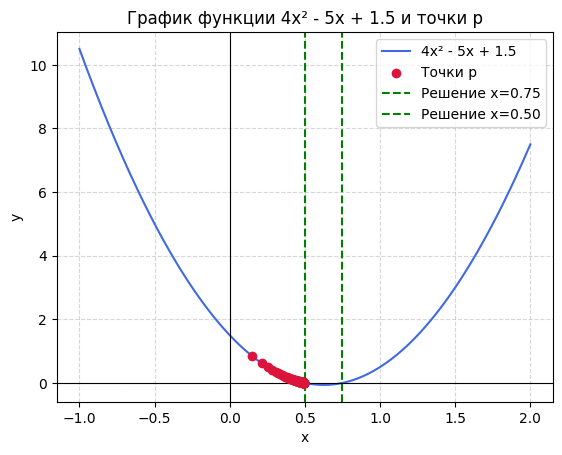

In [184]:
# solve 4x^2 - 5x + 1.5 = 0 with gradient descent
# 1. возводим в квадрат, потому что мы должны найти градиент - (4x^2 - 5x + 1.5)^2 = 0
# 2. derivative: 2 * (4x^2 − 5x + 1.5) * (8x − 5)

def grad(x):
    return 2 * (4 * x * x - 5 * x + 1.5) * (8 * x - 5)

def solve(iterations: int = 1000, eps: float = 1e-2, learning_rate: float = 1e-2):
    x0 = 0.0
    it = 0
    xs = []
    while it < iterations:
        if abs(grad(x0)) < eps:
            break
        x0 -= learning_rate * grad(x0)
        it += 1
        xs.append(x0)
    return xs


import numpy as np
import matplotlib.pyplot as plt

a, b, c = 4, -5, 1.5

x = np.linspace(-1, 2, 500)
y = a * x**2 + b * x + c

roots = np.roots([a, b, c])
solution_x_0 = roots[0]
solution_x_1 = roots[1]
solution_y_0 = a * solution_x_0**2 + b * solution_x_0 + c

# Массив точек p (пример) - только координаты x
p = np.array(solve())
p_y = a * p**2 + b * p + c

# Построение графика
plt.plot(x, y, label='4x² - 5x + 1.5', color='royalblue')
plt.scatter(p, p_y, color='crimson', label='Точки p', zorder=3)

# Добавление перпендикулярной линии к решению уравнения
plt.axvline(solution_x_0, color='green', linestyle='--', label=f'Решение x={solution_x_0:.2f}')
plt.axvline(solution_x_1, color='green', linestyle='--', label=f'Решение x={solution_x_1:.2f}')
# Добавление сетки, легенды и заголовков
plt.grid(True, linestyle='--', alpha=0.5)
plt.axhline(0, color='black', lw=0.8)
plt.axvline(0, color='black', lw=0.8)
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('График функции 4x² - 5x + 1.5 и точки p')

# Показать график
plt.show()
